# **Second Project - ML**

*Shir Sharoni, Itamar Avieli, Omer Abraham, Mor Baruch*

In [ ]:
from zipfile import ZipFile
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation , PReLU
from sklearn.metrics import accuracy_score


In [ ]:
from numpy.random.mtrand import seed
import tensorflow as tf
import random as rn
import os
tf.keras.utils.set_random_seed(1)

"os.environ['PYTHONHASHSEED'] = '0'\nos.environ['CUDA_VISIBLE_DEVICES'] = ''\nnp.random.seed(37)\nrn.seed(1254)\ntf.random.set_seed(89)"

In [ ]:
with ZipFile('cats_and_dogs_data.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
x_train = np.load("content/data/X_train.npy")  
x_test = np.load("content/data/X_test.npy") 
y_train = np.load("content/data/Y_train.npy") 
y_test = np.load("content/data/Y_test.npy") 

# **Exploring the Data**

At first we will see how our samples are built. <br>
We will see what are the size of the photos, and in what dimension are they.

In [ ]:
print('Shape of x_train is:', x_train.shape)
print('Shape of y_train is:', y_train.shape)
print('Shape of x_test is:', x_test.shape)
print('Shape of y_test is:', y_test.shape)
     

Shape of x_train is: (3200, 180, 180, 3)
Shape of y_train is: (3200,)
Shape of x_test is: (800, 180, 180, 3)
Shape of y_test is: (800,)


In [ ]:
np.min(x_train), np.max(x_train), x_train.dtype

(0.0, 255.0, dtype('float64'))

As we can see above are data is 180*180 pixels, when each pixel presented by RGB means 3-d.
We will normalize the values by split each of the RGB diemensions by 3. 

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
np.min(x_train), np.max(x_train), x_train.dtype
     

(0.0, 1.0, dtype('float64'))

Let's see what our labels represent: ( we checked both in the train & test data)

<Figure size 432x288 with 0 Axes>

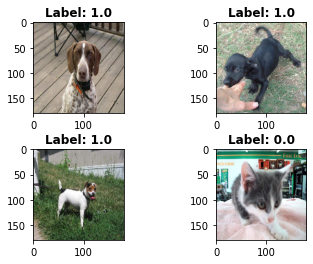

In [ ]:
def plot_random_samples(x, y):
  plt.figure()

  f, axarr = plt.subplots(2, 2, gridspec_kw={'hspace':0.4}) 
  rands = np.random.randint(x.shape[0], size=4)
  axarr[0, 0].imshow(x[rands[0], :, :])
  axarr[0, 0].set_title('Label: ' + str(y[rands[0]]), fontweight='bold')

  axarr[1, 0].imshow(x[rands[1], :, :])
  axarr[1, 0].set_title('Label: ' + str(y[rands[1]]), fontweight='bold')

  axarr[0, 1].imshow(x[rands[2], :, :])
  axarr[0, 1].set_title('Label: ' + str(y[rands[2]]), fontweight='bold')

  axarr[1, 1].imshow(x[rands[3], :, :])
  axarr[1, 1].set_title('Label: ' + str(y[rands[3]]), fontweight='bold')

  plt.show()

plot_random_samples(x_train, y_train)

<Figure size 432x288 with 0 Axes>

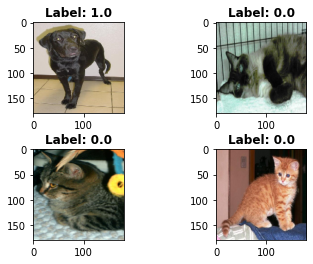

In [ ]:
plot_random_samples(x_test, y_test)

### Split to train & validation sets:

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=1/4)

In [ ]:
print('Shape of x_train is:', x_train.shape)
print('Shape of y_train is:', y_train.shape)
print('Shape of x_test is:', x_test.shape)
print('Shape of y_test is:', y_test.shape)
print('Shape of x_val is:', x_val.shape)
print('Shape of y_val is:', y_val.shape)

Shape of x_train is: (2400, 180, 180, 3)
Shape of y_train is: (2400,)
Shape of x_test is: (800, 180, 180, 3)
Shape of y_test is: (800,)
Shape of x_val is: (800, 180, 180, 3)
Shape of y_val is: (800,)


# 1st Experiment - Simple model
### Stracture -
- Four 2d convolutional layers, were between each convolutional layer we added MaxPolling.
- Flatten() - before the fully connected layers.
- Followed by two fully connected layer (one hidden layer and one output layer)
- We added dropout before the first hidden layer.

### Training -
- After a few tries we have decided to use batch_size=32, epochs= 20.


In [ ]:
conv_model = Sequential()

conv_model.add(Input(shape=(180, 180, 3)))
conv_model.add(Conv2D(16, kernel_size=(3, 3), activation="relu"))

conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))

conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Dropout(0.5))

conv_model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))

conv_model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))

conv_model.add(Flatten())
conv_model.add(Dropout(0.5))
conv_model.add(Dense(64, activation="sigmoid"))
conv_model.add(Dense(1, activation="sigmoid"))

In [ ]:
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 43, 43, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        1

In [ ]:
tf.random.set_seed(42)
conv_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = conv_model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs= 20)

Epoch 1/20
75/75 [==============================] - 12s 34ms/step - loss: 0.7031 - accuracy: 0.5071 - val_loss: 0.6925 - val_accuracy: 0.5063
Epoch 2/20
75/75 [==============================] - 2s 26ms/step - loss: 0.6892 - accuracy: 0.5425 - val_loss: 0.6849 - val_accuracy: 0.5975
Epoch 3/20
75/75 [==============================] - 2s 26ms/step - loss: 0.6675 - accuracy: 0.5863 - val_loss: 0.6766 - val_accuracy: 0.5362
Epoch 4/20
75/75 [==============================] - 2s 26ms/step - loss: 0.6469 - accuracy: 0.6017 - val_loss: 0.6319 - val_accuracy: 0.6162
Epoch 5/20
75/75 [==============================] - 2s 26ms/step - loss: 0.6339 - accuracy: 0.6254 - val_loss: 0.6214 - val_accuracy: 0.6237
Epoch 6/20
75/75 [==============================] - 2s 26ms/step - loss: 0.6191 - accuracy: 0.6396 - val_loss: 0.6155 - val_accuracy: 0.6137
Epoch 7/20
75/75 [==============================] - 2s 26ms/step - loss: 0.6018 - accuracy: 0.6667 - val_loss: 0.6174 - val_accuracy: 0.6112
Epoch 8/20
7

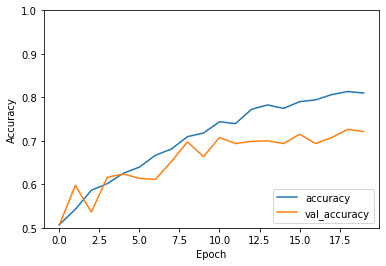

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

### **Results** 
As you can see below we recieve on the test 79% Acc.

In [ ]:
y_pred = conv_model.predict(x_test)
y_pred_labels = np.round(y_pred)
print('Accuracy: ', accuracy_score(y_test, y_pred_labels))

25/25 [==============================] - 0s 11ms/step
Accuracy:  0.79625


In [ ]:
train_pred = conv_model.predict(x_train)
train_pred_labels = np.round(train_pred)
print('Accuracy: ', accuracy_score(y_train, train_pred_labels))

75/75 [==============================] - 1s 12ms/step
Accuracy:  0.8670833333333333


# 2nd Experiment - Bulid your own CNN
### Stracture -
- Five 2d convolutional layers, were between each convolutional layer we added MaxPolling & dropout of 50%.
- Flatten() - before the fully connected layers.
- Followed by two fully connected layer (one hidden layer and one output layer)
- We added dropout before the first hidden layer.

### Training -
- After a few tries we have decided to use batch_size=32, epochs= 23.

In [ ]:
model = Sequential()

model.add(Input(shape=(180, 180, 3)))
model.add(Conv2D(16, kernel_size=(3, 3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 89, 89, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 43, 43, 32)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 43, 43, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 41, 41, 64)       

In [ ]:
tf.random.set_seed(42)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs= 23)

Epoch 1/23
75/75 [==============================] - 3s 35ms/step - loss: 0.6961 - accuracy: 0.4879 - val_loss: 0.6922 - val_accuracy: 0.5063
Epoch 2/23
75/75 [==============================] - 2s 26ms/step - loss: 0.6935 - accuracy: 0.5125 - val_loss: 0.6923 - val_accuracy: 0.5063
Epoch 3/23
75/75 [==============================] - 2s 26ms/step - loss: 0.6827 - accuracy: 0.5467 - val_loss: 0.6742 - val_accuracy: 0.5575
Epoch 4/23
75/75 [==============================] - 2s 26ms/step - loss: 0.6594 - accuracy: 0.5958 - val_loss: 0.6530 - val_accuracy: 0.5900
Epoch 5/23
75/75 [==============================] - 2s 26ms/step - loss: 0.6373 - accuracy: 0.6187 - val_loss: 0.6351 - val_accuracy: 0.6400
Epoch 6/23
75/75 [==============================] - 2s 26ms/step - loss: 0.6078 - accuracy: 0.6637 - val_loss: 0.5925 - val_accuracy: 0.6825
Epoch 7/23
75/75 [==============================] - 2s 27ms/step - loss: 0.5894 - accuracy: 0.6792 - val_loss: 0.5941 - val_accuracy: 0.6787
Epoch 8/23
75

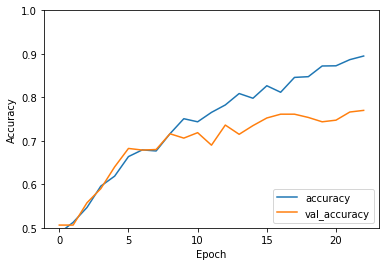

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

### **Results** 
As you can see we achived the same result with the new model - 80% Acc.

In [ ]:
y_pred = model.predict(x_test)
y_pred_labels = np.round(y_pred)
print('Accuracy: ', accuracy_score(y_test, y_pred_labels))

25/25 [==============================] - 0s 11ms/step
Accuracy:  0.8025


In [ ]:
train_pred = model.predict(x_train)
train_pred_labels = np.round(train_pred)
print('Accuracy: ', accuracy_score(y_train, train_pred_labels))

75/75 [==============================] - 1s 11ms/step
Accuracy:  0.9395833333333333


# 3rd Experiment - Transfer learning - load a pre-trained model
We used base_model without training, and transfered it to our data


In [ ]:
base_model = tf.keras.applications.InceptionV3(input_shape=(180,180,3), include_top=False)

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
base_model.trainable = False
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_9 (Conv2D)              (None, 89, 89, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 89, 89, 32)  96          ['conv2d_9[0][0]']               
 rmalization)                                                                                     
                                                                                       

In [ ]:
model_inputs = tf.keras.layers.Input(shape=(180,180,3))

model_outputs = base_model(model_inputs)
x = tf.keras.layers.Flatten()(model_outputs)

last_outputs = tf.keras.layers.Dense(1,activation="sigmoid")(x)

In [ ]:
model = tf.keras.models.Model(inputs=[model_inputs], outputs=[last_outputs])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 1)                 32769     
                                                                 
Total params: 21,835,553
Trainable params: 32,769
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy",metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=10, validation_data=(x_val,y_val), batch_size=32)

Epoch 1/10
75/75 [==============================] - 12s 89ms/step - loss: 0.7997 - accuracy: 0.9225 - val_loss: 0.3512 - val_accuracy: 0.9563
Epoch 2/10
75/75 [==============================] - 5s 69ms/step - loss: 0.3341 - accuracy: 0.9658 - val_loss: 0.2814 - val_accuracy: 0.9762
Epoch 3/10
75/75 [==============================] - 5s 69ms/step - loss: 0.2531 - accuracy: 0.9683 - val_loss: 0.3538 - val_accuracy: 0.9725
Epoch 4/10
75/75 [==============================] - 5s 70ms/step - loss: 0.0976 - accuracy: 0.9858 - val_loss: 0.4412 - val_accuracy: 0.9725
Epoch 5/10
75/75 [==============================] - 5s 70ms/step - loss: 0.0794 - accuracy: 0.9900 - val_loss: 0.3296 - val_accuracy: 0.9737
Epoch 6/10
75/75 [==============================] - 5s 70ms/step - loss: 0.0336 - accuracy: 0.9925 - val_loss: 0.4408 - val_accuracy: 0.9775
Epoch 7/10
75/75 [==============================] - 5s 70ms/step - loss: 0.0840 - accuracy: 0.9908 - val_loss: 0.4227 - val_accuracy: 0.9737
Epoch 8/10
7

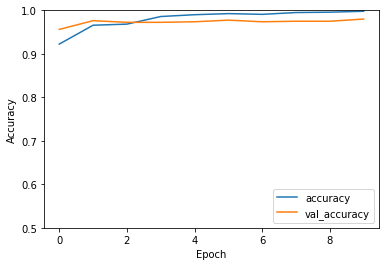

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

### **Results** 
Suprise! of course, we have recieved here the best score with 97.5% Acc.

In [ ]:
y_pred = model.predict(x_test)
y_pred_labels = np.round(y_pred)
print('Accuracy: ', accuracy_score(y_test, y_pred_labels))

25/25 [==============================] - 2s 48ms/step
Accuracy:  0.97125


In [ ]:
train_pred = model.predict(x_train)
train_pred_labels = np.round(train_pred)
print('Accuracy: ', accuracy_score(y_train, train_pred_labels))

75/75 [==============================] - 1s 14ms/step
Accuracy:  0.9966666666666667


In [ ]:

import pandas as pd
# Keep keys the same, and replace values according to your results and the specified type 

results = {'model': ['Basic CNN', 'My Model', 'InceptionV3'],
           'Test score (Accuracy)': ['79%', '80%', '97%'],
           'Train score (Accuracy)': ['0.8670833333333333', '0.9395833333333333', '0.9966666666666667'],
           'Number of trainable parameters': [761121, 542241, 32769],
           'Number of layers': [13, 14, 51],
           'Regularization methods': ['Dropout', 'Dropout', 'Dropout'],
           'Number of epochs': [20, 23, 10],
           'Loss function': ['binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy'],
           'Optimizer': ['adam', 'adam', 'rmsprop']
           }
df = pd.DataFrame(results)
df
    

,model,Test score (Accuracy),Train score (Accuracy),Number of trainable parameters,Number of layers,Regularization methods,Number of epochs,Loss function,Optimizer
0,Basic CNN,79%,0.8670833333333333,761121,13,Dropout,20,binary_crossentropy,adam
1,My Model,80%,0.9395833333333333,542241,14,Dropout,23,binary_crossentropy,adam
2,InceptionV3,97%,0.9966666666666667,32769,51,Dropout,10,binary_crossentropy,rmsprop


In [ ]:
import os
df.to_csv(os.path.join(os.getcwd(), 'result.csv'))